**Original code:**

170508288/170498071 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
____________________________________________________________

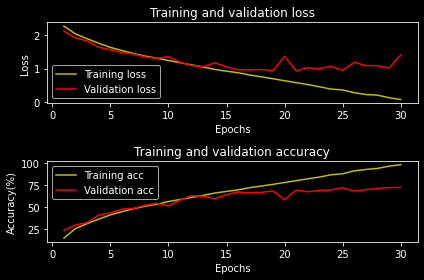

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

# We normalize the input according to the methods used in the paper
X_train = preprocess_input(X_train)
y_test = to_categorical(y_test)

# We one-hot-encode the labels for training
X_test = preprocess_input(X_test)
y_train = to_categorical(y_train)

from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(
    weights=None, 
    include_top=True, 
    classes=10,
    input_shape=(32,32,3)
)

# Expand this cell for the model summary
model.summary()

from tensorflow.keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model_history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=256,
    epochs=30,
    verbose=1
)

train_loss, train_score = model.evaluate(X_train, y_train)
test_loss, test_score = model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
print("Train F1 Score:", train_score)
print("Test F1 Score:", test_score)

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()

**Changing inclue_top to False:**

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

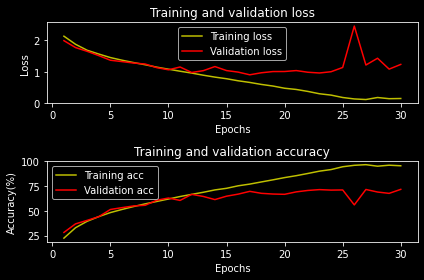

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

# We normalize the input according to the methods used in the paper
X_train = preprocess_input(X_train)
y_test = to_categorical(y_test)

# We one-hot-encode the labels for training
X_test = preprocess_input(X_test)
y_train = to_categorical(y_train)

from keras.applications.vgg16 import VGG16


model = VGG16(
    weights=None, 
    include_top=False, 
    input_shape=(32,32,3)
)

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)

# Expand this cell for the model summary
model.summary()

from tensorflow.keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model_history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=256,
    epochs=30,
    verbose=1
)

train_loss, train_score = model.evaluate(X_train, y_train)
test_loss, test_score = model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
print("Train F1 Score:", train_score)
print("Test F1 Score:", test_score)

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()